# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


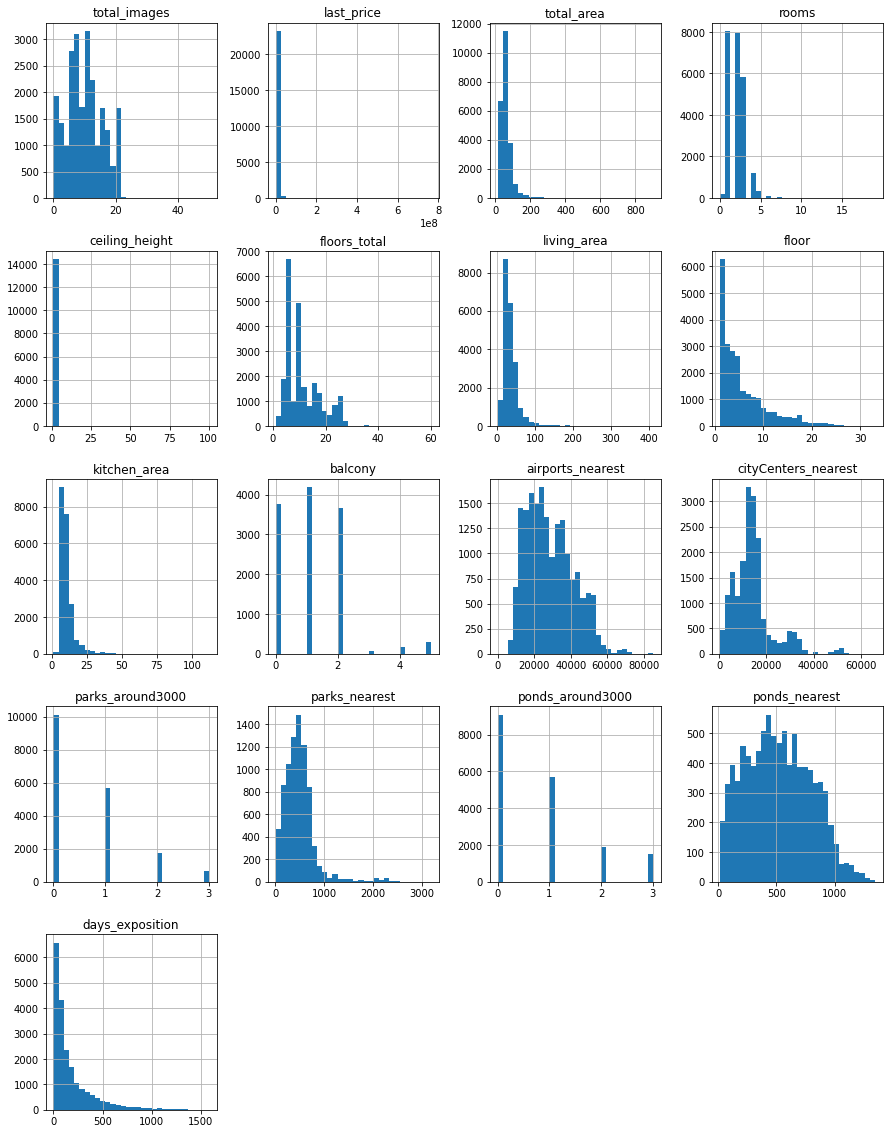

In [5]:
data.hist(bins=30, figsize=(15, 20), grid=True);

### Предобработка данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [8]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data.loc[data['balcony'].isna(), 'balcony'] = 0
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причины:
 1. Отсутствие данных(например рядом нет парка, нет балкона и т.д.)
 2. Продавец не указал данные(высота потолоков, жилая площадь)
 3. Система автозаполнения дала сбой, не заполнила расстояния до объектов и т.д.
 4. Ввели неверный формат данных
 5. При заполнение человек просто пропустил значения


In [9]:
data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['floors_total'])
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [10]:
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == i), 'ceiling_height'].mean()
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['rooms'] = data['rooms'].astype(int)
data['locality_name'] = data['locality_name'].astype(object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Замена типов данных:
 1. first_day_exposition перевел datetime тк это слоблец даты
 2. is_apartment в bool тк это подходит под логику столбца и другие столбцы в такой же логикой у нас в таблице этого типа
 3. ponds_around3000,parks_around3000, floors_total, balcony и rooms_total в int тк эти данные целочисленные а не дробные, поэтому int > float

In [13]:
#Код ревьюера
len(data.locality_name.unique())

364

In [14]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

len(data.locality_name.unique())

333

In [16]:
#Код ревьюера
len(data.locality_name.unique())

333

In [17]:
data.duplicated().sum()

0

Провели предобработку данных, избавились от пропусков, провели явные и неявные дубликаты, можно переходить к анализу полученных данных

 3 Посчитайте и добавьте в таблицу новые столбцы

In [18]:
data['price_per_meter'] = round(data['last_price'] / data['total_area'],2)
data['day_of_publishing'] = data['first_day_exposition'].dt.weekday
data['month_of_publishing'] = data['first_day_exposition'].dt.month
data['year_of_publishing'] = data['first_day_exposition'].dt.year

def type_floor(row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == max_floor:
        return 2
    elif floor == 1:
        return 1
    elif 1 < floor < max_floor:
        return 0
data['type_of_floor'] = data.apply(type_floor, axis=1)
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)

2 - последний, 1 - первый, 0 - другой

### Проведите исследовательский анализ данных

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

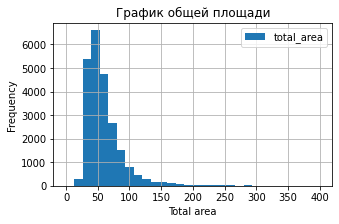

In [19]:
data.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3),range=(0,400), title='График общей площади').set_xlabel('Total area')
data['total_area'].describe()

Данные по общей площади впорядке, основная масса расположилась в районе 40-60 м2, после чего частоста пошла вниз, квартир с площадью больше 70 м2 мало, так же как квартир меньше 40 м2, свыше 170м2 практически нет

count    21686.000000
mean        34.473238
std         22.040462
min          9.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

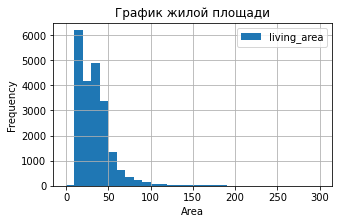

In [20]:
data.plot(y = 'living_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3),range=(0,300),title='График жилой площади').set_xlabel('Area')
data = data[data['living_area'] >= 9]
data['living_area'].describe()

Удалил данные, в которых жилая площадь < 9, тк они показались мне не совсем корректными и их число было маленьким(около 10), что не окажет критический эффект на результаты. Наблюдается большое число квартир с жилой площадью около 20м2, основная масса расположилась в промежутке 20-40м2, данные с промежутка 40-60, встречаются реже, еще больше встречается крайне редко

count    20893.000000
mean        10.505106
std          5.836650
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

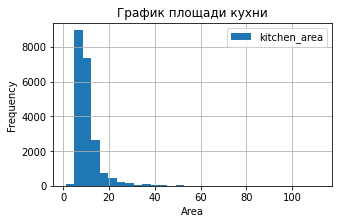

In [21]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3), title='График площади кухни').set_xlabel('Area')
data['kitchen_area'].describe()

Данные по площади кухни впорядке, основная масса в промежутке от 5 до 12, намного реже встречаются 12-20, свыше 20 и меньше 5 встречаются крайне редко

count    2.168600e+04
mean     6.498212e+06
std      1.088077e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

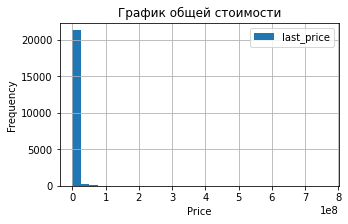

In [22]:
data.plot(y = 'last_price', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График общей стоимости').set_xlabel('Price')
data['last_price'].describe()

In [23]:
data['last_price'] = data['last_price'] / 1000000

/tmp/ipykernel_100/4177964435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_price'] = data['last_price'] / 1000000


count    21686.000000
mean         6.498212
std         10.880768
min          0.012190
25%          3.450000
50%          4.650000
75%          6.750000
max        763.000000
Name: last_price, dtype: float64

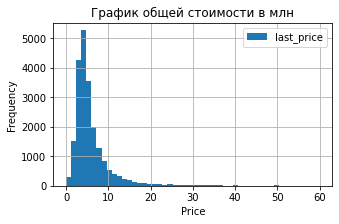

In [24]:
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (5,3), range=(0,60),title='График общей стоимости в млн').set_xlabel('Price')
data['last_price'].describe()

In [25]:
data = data[data['last_price'] != 0.01219]

Для наглядности поменял данные в столбце на миллионы, после чего удалил данные где стоимость равна 0.01219 миллиона(12 190р), что является слишком маленькой. Больше всего вариантов с ценой в районе 3-7 млн, с 7 до 12 встречаются реже, свыше 12 и меньше 3 являются редкими вариантами

count    21685.000000
mean         2.071985
std          1.080521
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

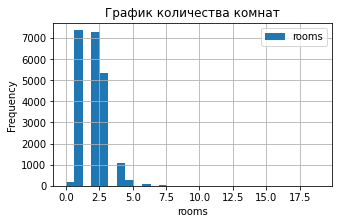

In [26]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График количества комнат').set_xlabel('rooms')
data['rooms'].describe()

In [27]:
data = data[data['rooms'] >= 1]

count    21504.000000
mean         2.089425
std          1.068135
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

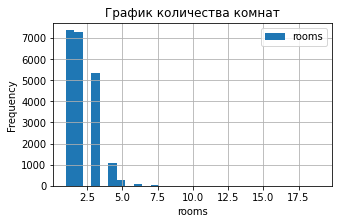

In [28]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График количества комнат').set_xlabel('rooms')
data['rooms'].describe()

 Удаляем данные где число комнат = 0, чаще всего встречаются однокомнатные и двукомнатные квартиры, трехкомнатные реже, свыше очень редко

count    21504.000000
mean         2.771117
std          1.044027
min          1.000000
25%          2.600000
50%          2.716667
75%          2.803717
max        100.000000
Name: ceiling_height, dtype: float64

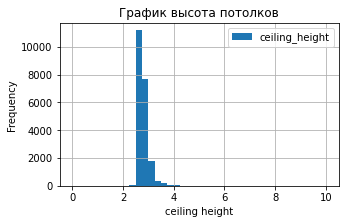

In [29]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 40, grid=True, figsize = (5,3),range = (0,10),title='График высота потолков').set_xlabel('ceiling height')
data['ceiling_height'].describe()

In [30]:
def myFun(x):
    return x/10
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, other = myFun)

/tmp/ipykernel_100/3439686976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, other = myFun)


count    21504.000000
mean         2.740106
std          0.247975
min          1.000000
25%          2.600000
50%          2.712857
75%          2.803717
max         10.000000
Name: ceiling_height, dtype: float64

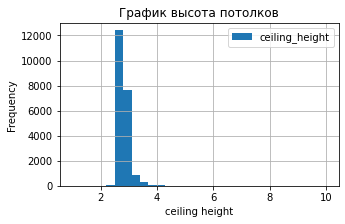

In [31]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График высота потолков').set_xlabel('ceiling height')
data['ceiling_height'].describe()

В основном высота потолков лежит в диапазоне от 2.6 до 2.8м, остальные данные встречаются редко

In [32]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21504 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21504 non-null  int64         
 1   last_price              21504 non-null  float64       
 2   total_area              21504 non-null  float64       
 3   first_day_exposition    21504 non-null  datetime64[ns]
 4   rooms                   21504 non-null  int64         
 5   ceiling_height          21504 non-null  float64       
 6   floors_total            21504 non-null  int64         
 7   living_area             21504 non-null  float64       
 8   floor                   21504 non-null  int64         
 9   is_apartment            21504 non-null  bool          
 10  studio                  21504 non-null  bool          
 11  open_plan               21504 non-null  bool          
 12  kitchen_area            20892 non-null  float6

count    21504.000000
mean        10.592401
std          6.537847
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

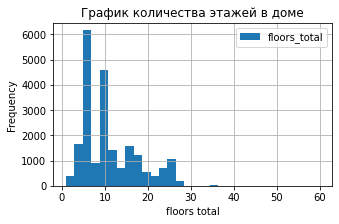

In [33]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График количества этажей в доме').set_xlabel('floors total')
data['floors_total'].describe()

Данные впорядке, в основном высота домов 5 и 9 этажей, остальные встречаются редко, свыше 25 очень редко

count    21504.000000
mean         0.408622
std          0.726983
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: type_of_floor, dtype: float64

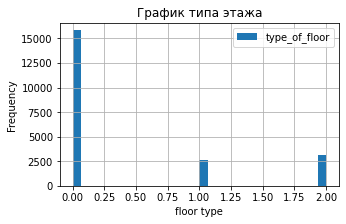

In [34]:
data.plot(y = 'type_of_floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График типа этажа').set_xlabel('floor type')
data['type_of_floor'].describe()

2 - последний, 1 - первый, 0 - другой, очевидно других этажей больше всего, последних этажей > первых

count    16692.000000
mean     14248.427510
std       8691.932265
min        181.000000
25%       9291.500000
50%      13107.000000
75%      16268.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

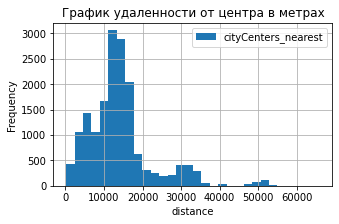

In [35]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График удаленности от центра в метрах').set_xlabel('distance')
data['cityCenters_nearest'].describe()

Основной промежуток 9000 - 15000м, свыше и ниже реже, свыше 25тысяч очень редко

count    7433.000000
mean      487.770618
std       338.394038
min         1.000000
25%       287.000000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

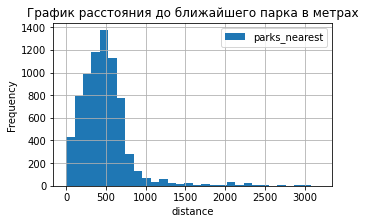

In [36]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3),title='График расстояния до ближайшего парка в метрах').set_xlabel('distance')
data['parks_nearest'].describe()

Удалили данные, в которых растояние меньше 5 метров, тк это подозрительно мало. Самое распространненое расстояние в 290 - 610 метров, свыше 1000 почти не встречаются

count    18542.000000
mean       185.451569
std        221.778916
min          1.000000
25%         44.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

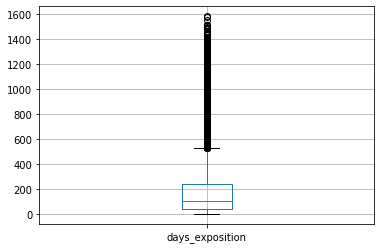

In [38]:
data.boxplot(['days_exposition'])
data['days_exposition'].describe()

In [39]:
data['days_exposition'].value_counts()

45.0      535
60.0      345
7.0       207
30.0      198
4.0       167
         ... 
818.0       1
969.0       1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1121, dtype: int64

Говоря про days_exposition, нельзя утверждать, что объявление было снято именно из-за продажи, но будем считать именно так, использовав value_count(), видим, что наиболее частые значения 60, 45, 30,7 честно говоря являются слишком подозрительными, как-будто именно через такой срок объявления снимаются автоматически, поигравшись с разными критериями, найти что-то общее не получилось( Но чуйка аналитика подсказывает, что все равно следует их убрать, как и данные меньше недели, тк складывается ощущение, что продавцы просто передумали. Так же можно уточнить причины у людей собирающие данные)

count    17792.00000
mean       191.69031
std        224.22266
min          1.00000
25%         45.00000
50%        109.00000
75%        250.25000
max       1580.00000
Name: days_exposition, dtype: float64

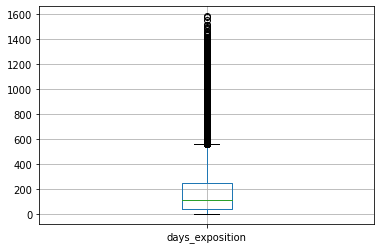

In [40]:
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 7')
good_data.boxplot(['days_exposition'])
good_data['days_exposition'].describe()

медиана - 109 дней, среднее 191 день, быстрые - быстрее 45 дней, долгими свыше 250 дней

0.6415579809196723

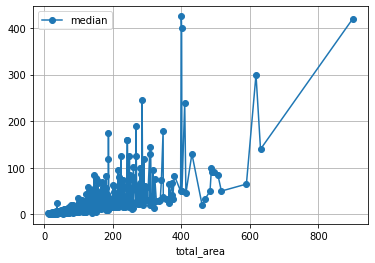

In [41]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', grid=True, style = '-o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

Зависимость достаточно сильная, согласно корреляции Пирсона - 0.64

0.5668292963384344

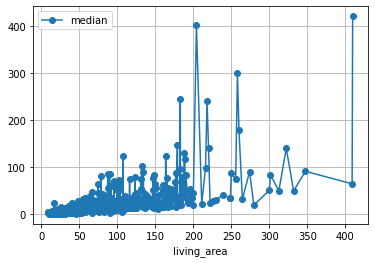

In [42]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', grid=True, style = '-o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

в этом случае зависимость поменьше, но все равно есть, согласно корреляции Пирсона - 0.56

0.5193404022803414

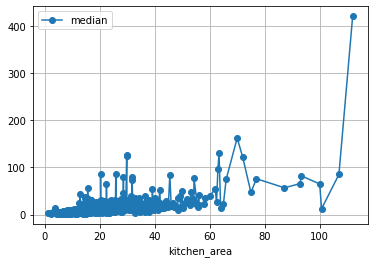

In [43]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', grid=True, style = '-o')

pivot_table_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Зависимость стала еще меньше, но еще присутствует, согласно корреляции Пирсона - 0.51

0.3617744107488708

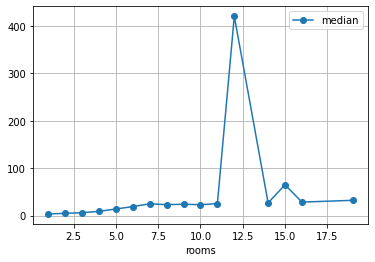

In [44]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median', grid=True, style = '-o')

pivot_table_rooms.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Зависимость снова уменьшилась, и уже не обладает такой силой, согласно корреляции Пирсона - 0.36

0.0014003266047569979

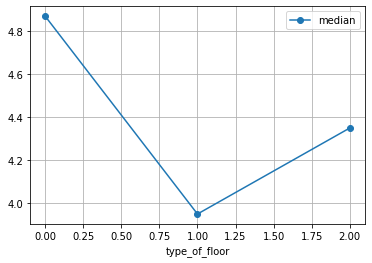

In [45]:
pivot_table_type_of_floor = data.pivot_table(index = 'type_of_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_type_of_floor.columns = ['mean', 'count', 'median']
pivot_table_type_of_floor.plot(y = 'median', grid=True, style = '-o')

pivot_table_rooms.sort_values('median', ascending = False)

data['type_of_floor'].corr(data['last_price'])

Зависимости нет, согласно корреляции Пирсона - -0.02
(2 - последний, 1 - первый, 0 - другой)

-2.1023575614669348e-05

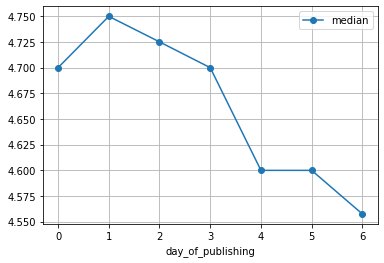

In [46]:
pivot_table_day_of_publishing = data.pivot_table(index = 'day_of_publishing', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_of_publishing.columns = ['mean', 'count', 'median']
pivot_table_day_of_publishing.plot(y = 'median', grid=True, style = '-o')

pivot_table_day_of_publishing.sort_values('median', ascending = False)

data['day_of_publishing'].corr(data['last_price'])

Зависимости нет, согласно корреляции Пирсона - -0.007

0.001672680692157024

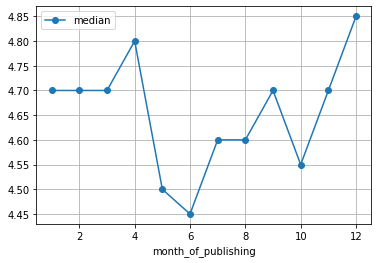

In [47]:
pivot_table_month_of_publishing = data.pivot_table(index = 'month_of_publishing', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_of_publishing.columns = ['mean', 'count', 'median']
pivot_table_month_of_publishing.plot(y = 'median', grid=True, style = '-o')

pivot_table_month_of_publishing.sort_values('median', ascending = False)

data['month_of_publishing'].corr(data['last_price'])

Зависимости нет, согласно корреляции Пирсона - -0.001

-0.038086359932301146

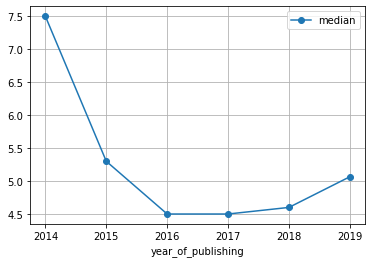

In [48]:
pivot_table_year_of_publishing = data.pivot_table(index = 'year_of_publishing', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_of_publishing.columns = ['mean', 'count', 'median']
pivot_table_year_of_publishing.plot(y = 'median', grid=True, style = '-o')

pivot_table_year_of_publishing.sort_values('median', ascending = False)

data['year_of_publishing'].corr(data['last_price'])

Зависимости нет, согласно корреляции Пирсона - -0.03

In [49]:
top_locality = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
(data
    .query('locality_name in @top_locality.index')
    .pivot_table(index='locality_name', values='price_per_meter', aggfunc='median').sort_values('price_per_meter'))

,price_per_meter
locality_name,
Всеволожск,65789.470
Гатчина,67746.285
Колпино,74723.745
посёлок Шушары,77272.730
Петергоф,81993.570
посёлок Мурино,85714.290
посёлок Парголово,92051.280
деревня Кудрово,92418.470
Пушкин,100000.000


In [50]:
top_10_locality[top_10_locality['mean'] == top_10_locality['mean'].max()]

NameError: name 'top_10_locality' is not defined

In [ ]:
top_10_locality[top_10_locality['mean'] == top_10_locality['mean'].min()]

Из 10 самых популярных, самое дорогое среднее значение квадратного метра в СПБ - 114141., самое маленькое в Гатчино 68627.

In [ ]:
pivot_table_km = data.dropna(subset=['cityCenters_nearest_km']).pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean')

In [ ]:
pivot_table_km.plot(grid=True, style = '-o')
data['cityCenters_nearest_km'].corr(data['price_per_meter'])

В центре действительно самое дорогое жилье за квадратный метр, однако в районе 8 км, также наблюдается скачёк, скорее всего что-то в райне исторического центра, но прямой зависимости нет

ОБШИЙ ВЫВОД: Проведя анализ можно сказать следующие:
    1.Данные нуждались в обработке, что я и реализовал, хоть и некоторым числом пришлось пожертвовать
    2.Продажи квартир: медиана - 109 дней, среднее 191 день, быстрые - быстрее 45 дней, долгими свыше 250 дней, также есть очень быстрые продажи менее 10 дней и очень долгие свыше 600 дней
    3.Больше всего на итоговую стоимость влияют Общая площадь, жилая площадь, чуть меньше влияют площаль кухни и количество комнат, этаж, дата, месяц и год публикации вообще не влияют на итоговую цену
    4.Расчитали среднию цену в 10 самых популярных населенных пунктах самое дорогое среднее значение квадратного метра в СПБ - 114141р., самое маленькое в Гатчино 68627р.
    5.Узнали, что прямой зависимости от расстояние до центра СПБ нет, хоть в центре все равно жилье дороже.
Не смотря не сделанные выводы с данными можно еще работать и работать, можно проверить и сделать выводы по оставшимся факторам, тк например наличие или отсутствие парков и водоемов и расстояние до них или зависимость цены и общего количества этажей